In [109]:
#https://archive.ics.uci.edu/dataset/222/bank+marketing
#importar os dados (X)
#analise desritiva das variaveis
#modelo de classificacao


Os dados contém informações sobre clientes abordados em uma campanha de marketing por telefone. O objetivo desta análise é criar um modelo para estimar se um cliente vai ou não fazer um depósito no banco (variável resposta denominada y).

* Variáveis: 
    - y: Se no cliente dez um depósito (Variável resposta)
    - age: Idade
    - job: Ocupação
    - marital: Estado civil (divorciado, casado ou solteiro)
    - education: Nível de educação
    - default: Se o cliente tem crédito em inadimplência
    - balance: Saldo médio anual
    - housing: Se tem empréstimo imobiliário
    - loan: Se tem empréstimo pessoal
    - contact: Tipo de contato (celular ou telefone)
    - day_of_week: Dia da semana do último contato
    - month: Mês do último contato
    - duration: Duração (em segundos) do último contato
    - campaign: Número de contatos feito com o cliente durante o período da campanha
    - pdays: Número de dias que se passaram deste o último contato em uma campanha anterior
    - previous: Número de dias que se passaram deste o último contato nesta mesma campanha
    - poutcome: Resultado da campanha anterior

In [110]:
#acessando os dados
from ucimlrepo import fetch_ucirepo 
import pandas as pd

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features 
y = bank_marketing.data.targets

X.loc[:,'pdays'] = X['pdays'].replace(-1,0)
X.loc[:,'poutcome'] = X['poutcome'].fillna("nonexistent")

df = pd.concat([y,X],axis=1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   y            45211 non-null  object
 1   age          45211 non-null  int64 
 2   job          44923 non-null  object
 3   marital      45211 non-null  object
 4   education    43354 non-null  object
 5   default      45211 non-null  object
 6   balance      45211 non-null  int64 
 7   housing      45211 non-null  object
 8   loan         45211 non-null  object
 9   contact      32191 non-null  object
 10  day_of_week  45211 non-null  int64 
 11  month        45211 non-null  object
 12  duration     45211 non-null  int64 
 13  campaign     45211 non-null  int64 
 14  pdays        45211 non-null  int64 
 15  previous     45211 non-null  int64 
 16  poutcome     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [112]:
#visualização dos dados
df.head(6)

,y,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,0,0,nonexistent
1,no,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,0,0,nonexistent
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,0,0,nonexistent
3,no,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,0,0,nonexistent
4,no,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,0,0,nonexistent
5,no,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,0,0,nonexistent


# Estatística descritiva

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_variables = ["y","age","balance","duration","campaign"]

#for i in numerical_variables:
#    print(i)
#    display(df.groupby('y')[i].describe())
display(df['y'].value_counts())
display(df[numerical_variables].describe())
for i in numerical_variables[1:4]:
    display(i)
    display(df.groupby('y')[i].describe())

y
no     39922
yes     5289
Name: count, dtype: int64

,age,balance,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841
std,10.618762,3044.765829,257.527812,3.098021
min,18.000000,-8019.000000,0.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000
75%,48.000000,1428.000000,319.000000,3.000000
max,95.000000,102127.000000,4918.000000,63.000000


'age'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,40.838986,10.172662,18.0,33.0,39.0,48.0,95.0
yes,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0


'balance'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


'duration'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


45211


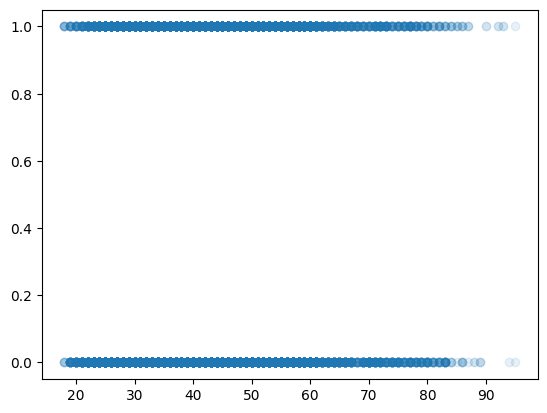

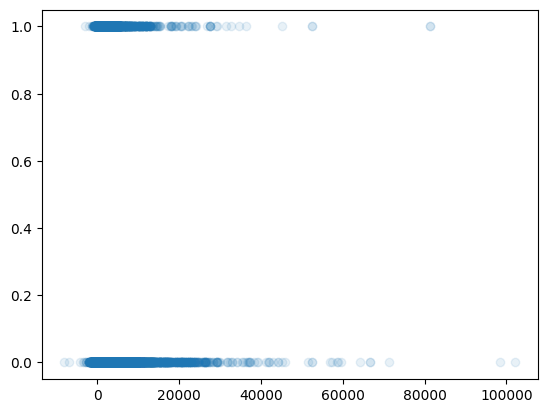

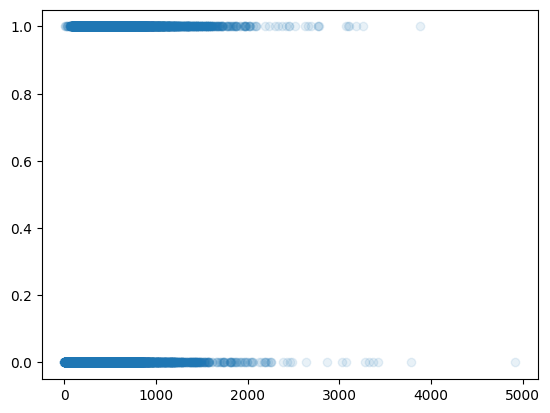

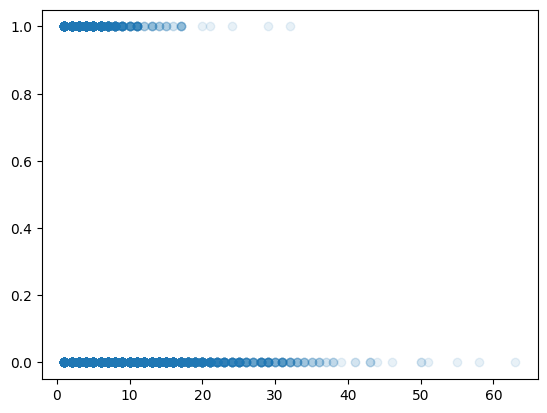

In [114]:
from pandas.plotting import scatter_matrix

#sns.set(font_scale=1.3,rc = {'figure.figsize':(5,5)})
#plt.figure(figsize=(5,5))

ry = df.replace({'y': {'yes': 1,  'no': 0}})
pd.set_option('future.no_silent_downcasting', True)
print(len(ry))
attributes = ['age','balance','duration','campaign']
for i in attributes:
#scatter_matrix(df[attributes], figsize=(12, 8))
    plt.scatter(x=ry[i],y=ry['y'],alpha=0.1)
    plt.show()

In [115]:
#df["poutcome"] = df["poutcome"].fillna('nonexistent', inplace=True)

print(df['poutcome'].unique())

['nonexistent' 'failure' 'other' 'success']


In [116]:
df[numerical_variables].groupby('y').corr()

age   balance  duration  campaign
y                                                   
no  age       1.000000  0.091440 -0.012079  0.009698
    balance   0.091440  1.000000  0.011853 -0.012119
    duration -0.012079  0.011853  1.000000 -0.099603
    campaign  0.009698 -0.012119 -0.099603  1.000000
yes age       1.000000  0.122228 -0.027995 -0.020674
    balance   0.122228  1.000000 -0.036677  0.001535
    duration -0.027995 -0.036677  1.000000  0.160473
    campaign -0.020674  0.001535  0.160473  1.000000

In [117]:
df_has = df[df['pdays'] >= 0]
display(df_has.groupby('y')['pdays'].describe())

#numerical_variables2 = ['previous']
#for i in numerical_variables2:
#    print(i)
#    display(df.groupby('y')[i].describe())

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,37.262261,96.432053,0.0,0.0,0.0,0.0,871.0
yes,5289.0,69.342787,118.447245,0.0,0.0,0.0,98.0,854.0


In [118]:
#freq = df.groupby('y')['month'].value_counts()
#freq

y    contact  
no   cellular     24916
     telephone     2516
yes  cellular      4369
     telephone      390
Name: count, dtype: int64

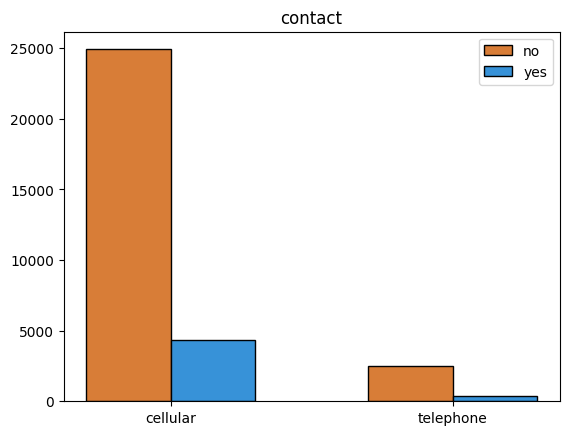

y    marital 
no   married     24459
     single      10878
     divorced     4585
yes  married      2755
     single       1912
     divorced      622
Name: count, dtype: int64

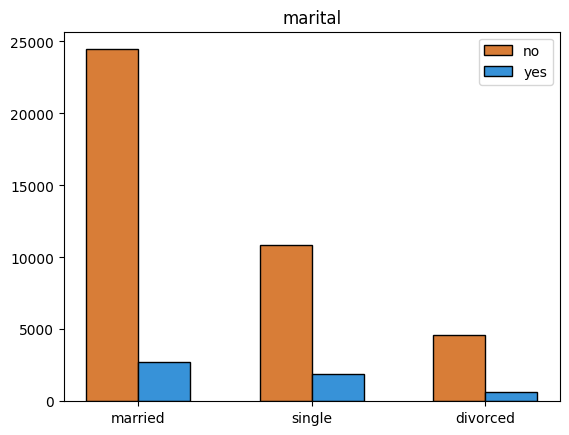

y    education
no   secondary    20752
     tertiary     11305
     primary       6260
yes  secondary     2450
     tertiary      1996
     primary        591
Name: count, dtype: int64

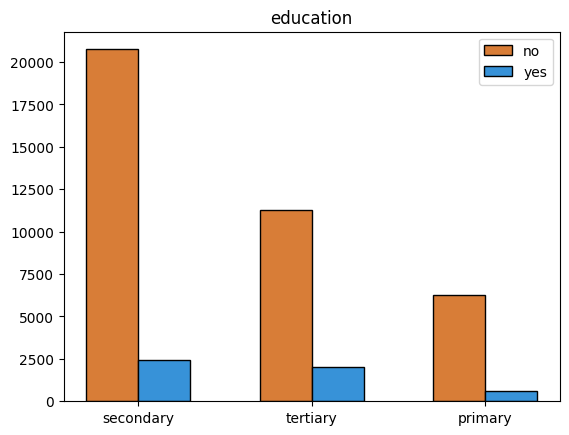

y    poutcome   
no   nonexistent    33573
     failure         4283
     other           1533
     success          533
yes  nonexistent     3386
     success          978
     failure          618
     other            307
Name: count, dtype: int64

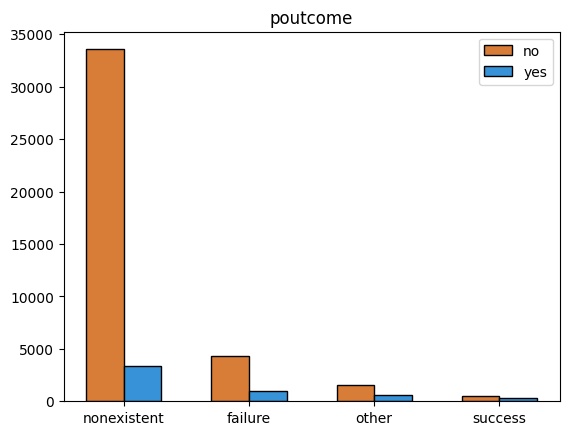

y    month
no   may      12841
     jul       6268
     aug       5559
     jun       4795
     nov       3567
     apr       2355
     feb       2208
     jan       1261
     oct        415
     sep        310
     mar        229
     dec        114
yes  may        925
     aug        688
     jul        627
     apr        577
     jun        546
     feb        441
     nov        403
     oct        323
     sep        269
     mar        248
     jan        142
     dec        100
Name: count, dtype: int64

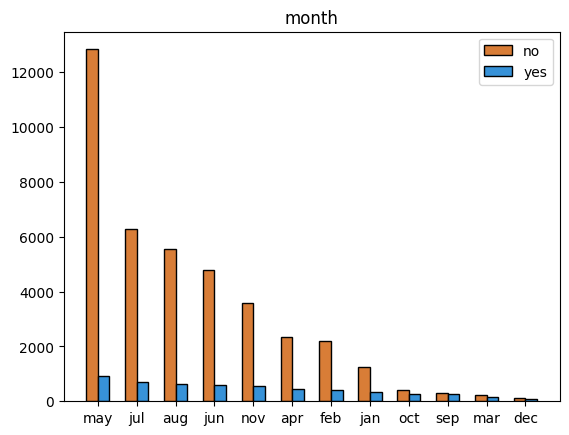

In [119]:
categorical_variables = ['contact','marital','education','poutcome','month']

for i in categorical_variables:
    prop = []
    freq = df.groupby('y')[i].value_counts()#/len(df.index)
    for j in freq.index:
        prop.append(freq[j])

    labels = freq.index[0:int(len(prop)/2)]
    new_labels = []
    for z,name in enumerate(labels):
        new_labels.append(name[1])

    prop_no = prop[0:int(len(prop)/2)]
    prop_yes = prop[int(len(prop)/2) :]

    display(freq)
    fig, ax = plt.subplots()
    width = 0.3
    x = np.arange(len(labels))
    rects1 = ax.bar(x-width/2, prop_no, width,color = '#d87d37',edgecolor='black',label = 'no')
    rects2 = ax.bar(x+width/2, prop_yes, width,color = '#3792d8',edgecolor='black',label = 'yes')
    plt.title(i)
    plt.xticks(x, new_labels)
    ax.legend(handles=[rects1, rects2])
    plt.show()

y    marital 
no   married     0.540997
     single      0.240605
     divorced    0.101413
yes  married     0.060936
     single      0.042291
     divorced    0.013758
Name: count, dtype: float64

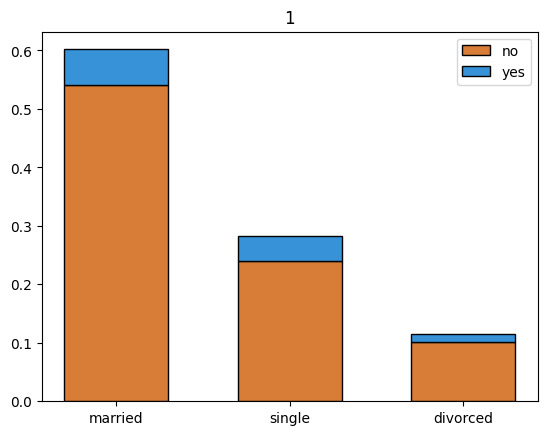

y    education
no   secondary    0.459003
     tertiary     0.250050
     primary      0.138462
yes  secondary    0.054190
     tertiary     0.044149
     primary      0.013072
Name: count, dtype: float64

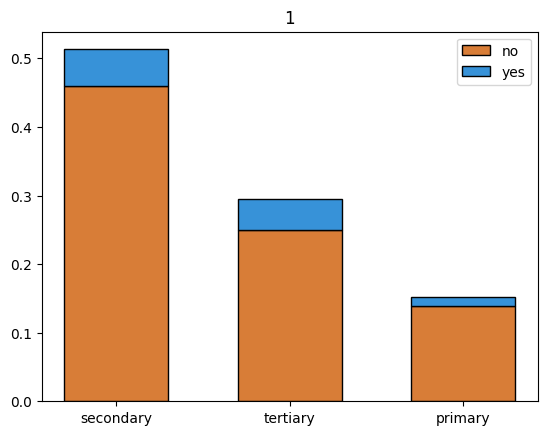

y    poutcome   
no   nonexistent    0.742585
     failure        0.094734
     other          0.033908
     success        0.011789
yes  nonexistent    0.074893
     success        0.021632
     failure        0.013669
     other          0.006790
Name: count, dtype: float64

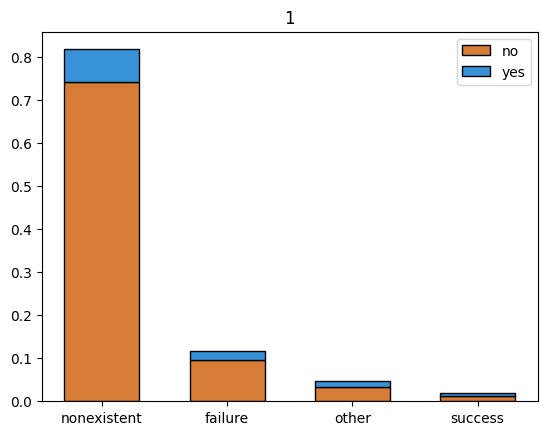

In [120]:
categorical_variables = ['marital','education','poutcome']#

for i in categorical_variables:
    prop = []
    freq = df.groupby('y')[i].value_counts()/len(df.index)#df.groupby('y')[i].value_counts(normalize=True).round(2)
    for j in freq.index:
        prop.append(freq[j])

    labels = freq.index[0:int(len(prop)/2)]
    new_labels = []
    for z,name in enumerate(labels):
        new_labels.append(name[1])

    prop_no = prop[0:int(len(prop)/2)]
    prop_yes = prop[int(len(prop)/2) :]

    weight_counts = {'no':prop_no,'yes':prop_yes}
    bottom = np.zeros(len(new_labels))

    display(freq)
    fig, ax = plt.subplots()
    colors = ['#d87d37', '#3792d8']

    width = 0.6
    x = np.arange(len(labels))
    for (i,(boolean, weight_count)) in enumerate(weight_counts.items()):
        p = ax.bar(new_labels, weight_count, width, label=boolean, bottom=bottom,color = colors[i],edgecolor='black')
        bottom += weight_count
    
    plt.title(i)
    plt.xticks(x, new_labels)
    ax.legend(handles=[rects1, rects2])
    plt.show()

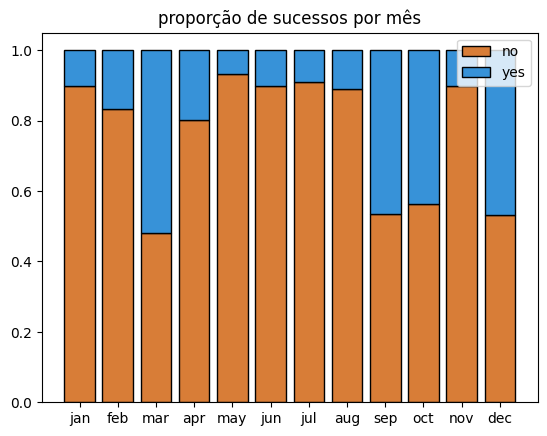

In [121]:
mounths = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
prop_no = []
prop_yes = []

freq = df.groupby('y')['month'].value_counts()

for i in mounths:
    m = []
    for j in freq[:,i]:
        m.append(j)
    prop_no.append(m[0]/(m[0]+m[1]))
    prop_yes.append(m[1]/(m[0]+m[1]))

weight_counts = {'no':prop_no,'yes':prop_yes}
bottom = np.zeros(len(mounths))

fig, ax = plt.subplots()
colors = ['#d87d37', '#3792d8']

width = 0.8
x = np.arange(len(labels))
for (i,(boolean, weight_count)) in enumerate(weight_counts.items()):
    p = ax.bar(mounths, weight_count, width, label=boolean, bottom=bottom,color = colors[i],edgecolor='black')
    bottom += weight_count
    
plt.title('proporção de sucessos por mês')
#plt.xticks(x, mounths)
ax.legend(handles=[rects1, rects2])
plt.show()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   y            45211 non-null  object
 1   age          45211 non-null  int64 
 2   job          44923 non-null  object
 3   marital      45211 non-null  object
 4   education    43354 non-null  object
 5   default      45211 non-null  object
 6   balance      45211 non-null  int64 
 7   housing      45211 non-null  object
 8   loan         45211 non-null  object
 9   contact      32191 non-null  object
 10  day_of_week  45211 non-null  int64 
 11  month        45211 non-null  object
 12  duration     45211 non-null  int64 
 13  campaign     45211 non-null  int64 
 14  pdays        45211 non-null  int64 
 15  previous     45211 non-null  int64 
 16  poutcome     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Regressão Logística

In [123]:
# separando o conjunto de teste
#bernoulli/logit
#preparar os dados
#amostra
#criar modelo
#avaliar modelo
from sklearn.model_selection import train_test_split
from feature_engine import encoding,imputation
from sklearn import pipeline

data_copy =  df.copy()#df[["y","poutcome","housing"]]##"contact",,"marital","campaign","age"
data_copy = data_copy.drop(columns=["duration"])
y_copy = data_copy["y"]
X_copy = data_copy.drop(columns=["y"])

X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2,stratify=y_copy,random_state=42)

cat_variables = ["job","marital","education","month","poutcome","default","housing","loan","contact"]
mode = imputation.CategoricalImputer(variables = ["job","education"],imputation_method='frequent')
unknow = imputation.CategoricalImputer(variables = "contact",fill_value="unknown")
onehot = encoding.OneHotEncoder(variables=cat_variables)

my_pipeline = pipeline.Pipeline([
    ("mode",mode),
    ("unknow",unknow),
    ("onehot",onehot)
])
X_train = my_pipeline.fit_transform(X_train)#aprende e aplica os padroes
X_test = my_pipeline.transform(X_test)#so aplica os padroes

#------

#X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2,stratify=y_copy,random_state=42)
#
#cat_variables = ["poutcome","housing"]#,"contact","marital",
##unknow = imputation.CategoricalImputer(variables = "contact",fill_value="unknown")
#onehot = encoding.OneHotEncoder(variables=cat_variables)
#
#my_pipeline = pipeline.Pipeline([
#    #("unknow",unknow),
#    ("onehot",onehot)
#])
#X_train = my_pipeline.fit_transform(X_train)#aprende e aplica os padroes
#X_test = my_pipeline.transform(X_test)#so aplica os padroes
#
display(X_train)

,age,balance,day_of_week,campaign,pdays,previous,job_technician,job_student,job_unemployed,job_blue-collar,...,poutcome_success,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_telephone,contact_cellular,contact_unknown
24001,36,861,29,2,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
43409,24,4126,5,4,185,7,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
20669,44,244,12,4,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
18810,48,0,31,11,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
23130,38,257,26,10,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17958,50,917,30,2,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
15941,36,22,22,5,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
16952,45,79,25,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
34781,27,2559,6,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0


In [124]:
#X_train.isna().sum()

In [125]:
from sklearn.linear_model import LogisticRegression
from scipy import stats

LogisticModel = LogisticRegression(class_weight="balanced",max_iter = 1000)#max_iter #,penalty = None
LogisticModel.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [126]:
#y_t = map(lambda x: 1 if x== "yes" else 0,y_test)
#y_hat_prob = LogisticModel.predict_proba(X_test).astype(float)
#plt.scatter(x = y_t,y = y_hat_prob)


In [127]:
from sklearn import metrics
print(metrics.roc_auc_score(y_test,LogisticModel.predict_proba(X_test)[:,1]))

0.7699540608394995


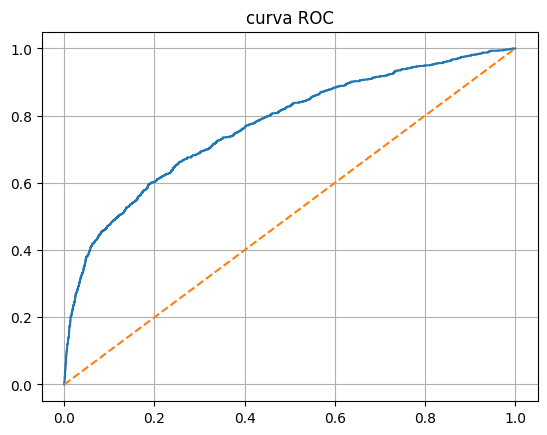

In [128]:
#curva ROC


roc_curve = metrics.roc_curve(y_test,LogisticModel.predict_proba(X_test)[:,1],pos_label="yes")

plt.plot(roc_curve[0],roc_curve[1])
plt.plot([0,1],[0,1],"--")
plt.title("curva ROC")
plt.grid()
plt.show()

In [129]:

p = 0.5
nb_predict = LogisticModel.predict_proba(X_test)[:,1] >= p
nb_predict = np.array(list(map(lambda n :'yes' if n else'no',nb_predict)))

CM = metrics.confusion_matrix(y_test, nb_predict)
CM = pd.DataFrame(CM)
print(CM)
print("Reg losgítica  acurácia = ",metrics.accuracy_score(y_test, nb_predict))
print("Reg losgítica presição = ",metrics.precision_score(y_test, nb_predict, pos_label="yes"))
print("Reg losgítica Recall = ",metrics.recall_score(y_test, nb_predict, pos_label="yes"))

      0     1
0  6135  1850
1   394   664
Reg losgítica  acurácia =  0.7518522614176711
Reg losgítica presição =  0.26412092283214
Reg losgítica Recall =  0.6275992438563327


# Árvore

In [130]:
from sklearn import tree

treeModel = tree.DecisionTreeClassifier(max_depth=2,class_weight="balanced")#max_depth=5 #
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

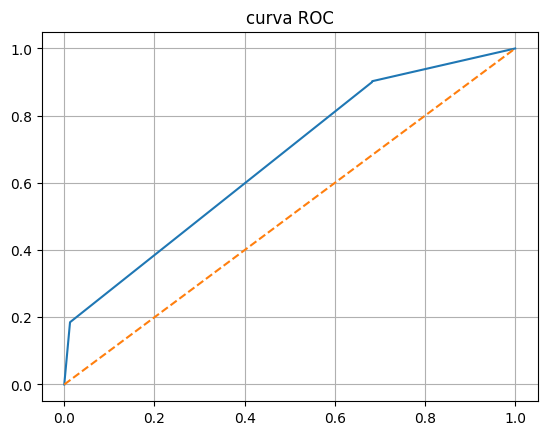

In [131]:
roc_curve = metrics.roc_curve(y_test,treeModel.predict_proba(X_test)[:,1],pos_label="yes")
plt.plot(roc_curve[0],roc_curve[1])
plt.plot([0,1],[0,1],"--")
plt.title("curva ROC")
plt.grid()
plt.show()

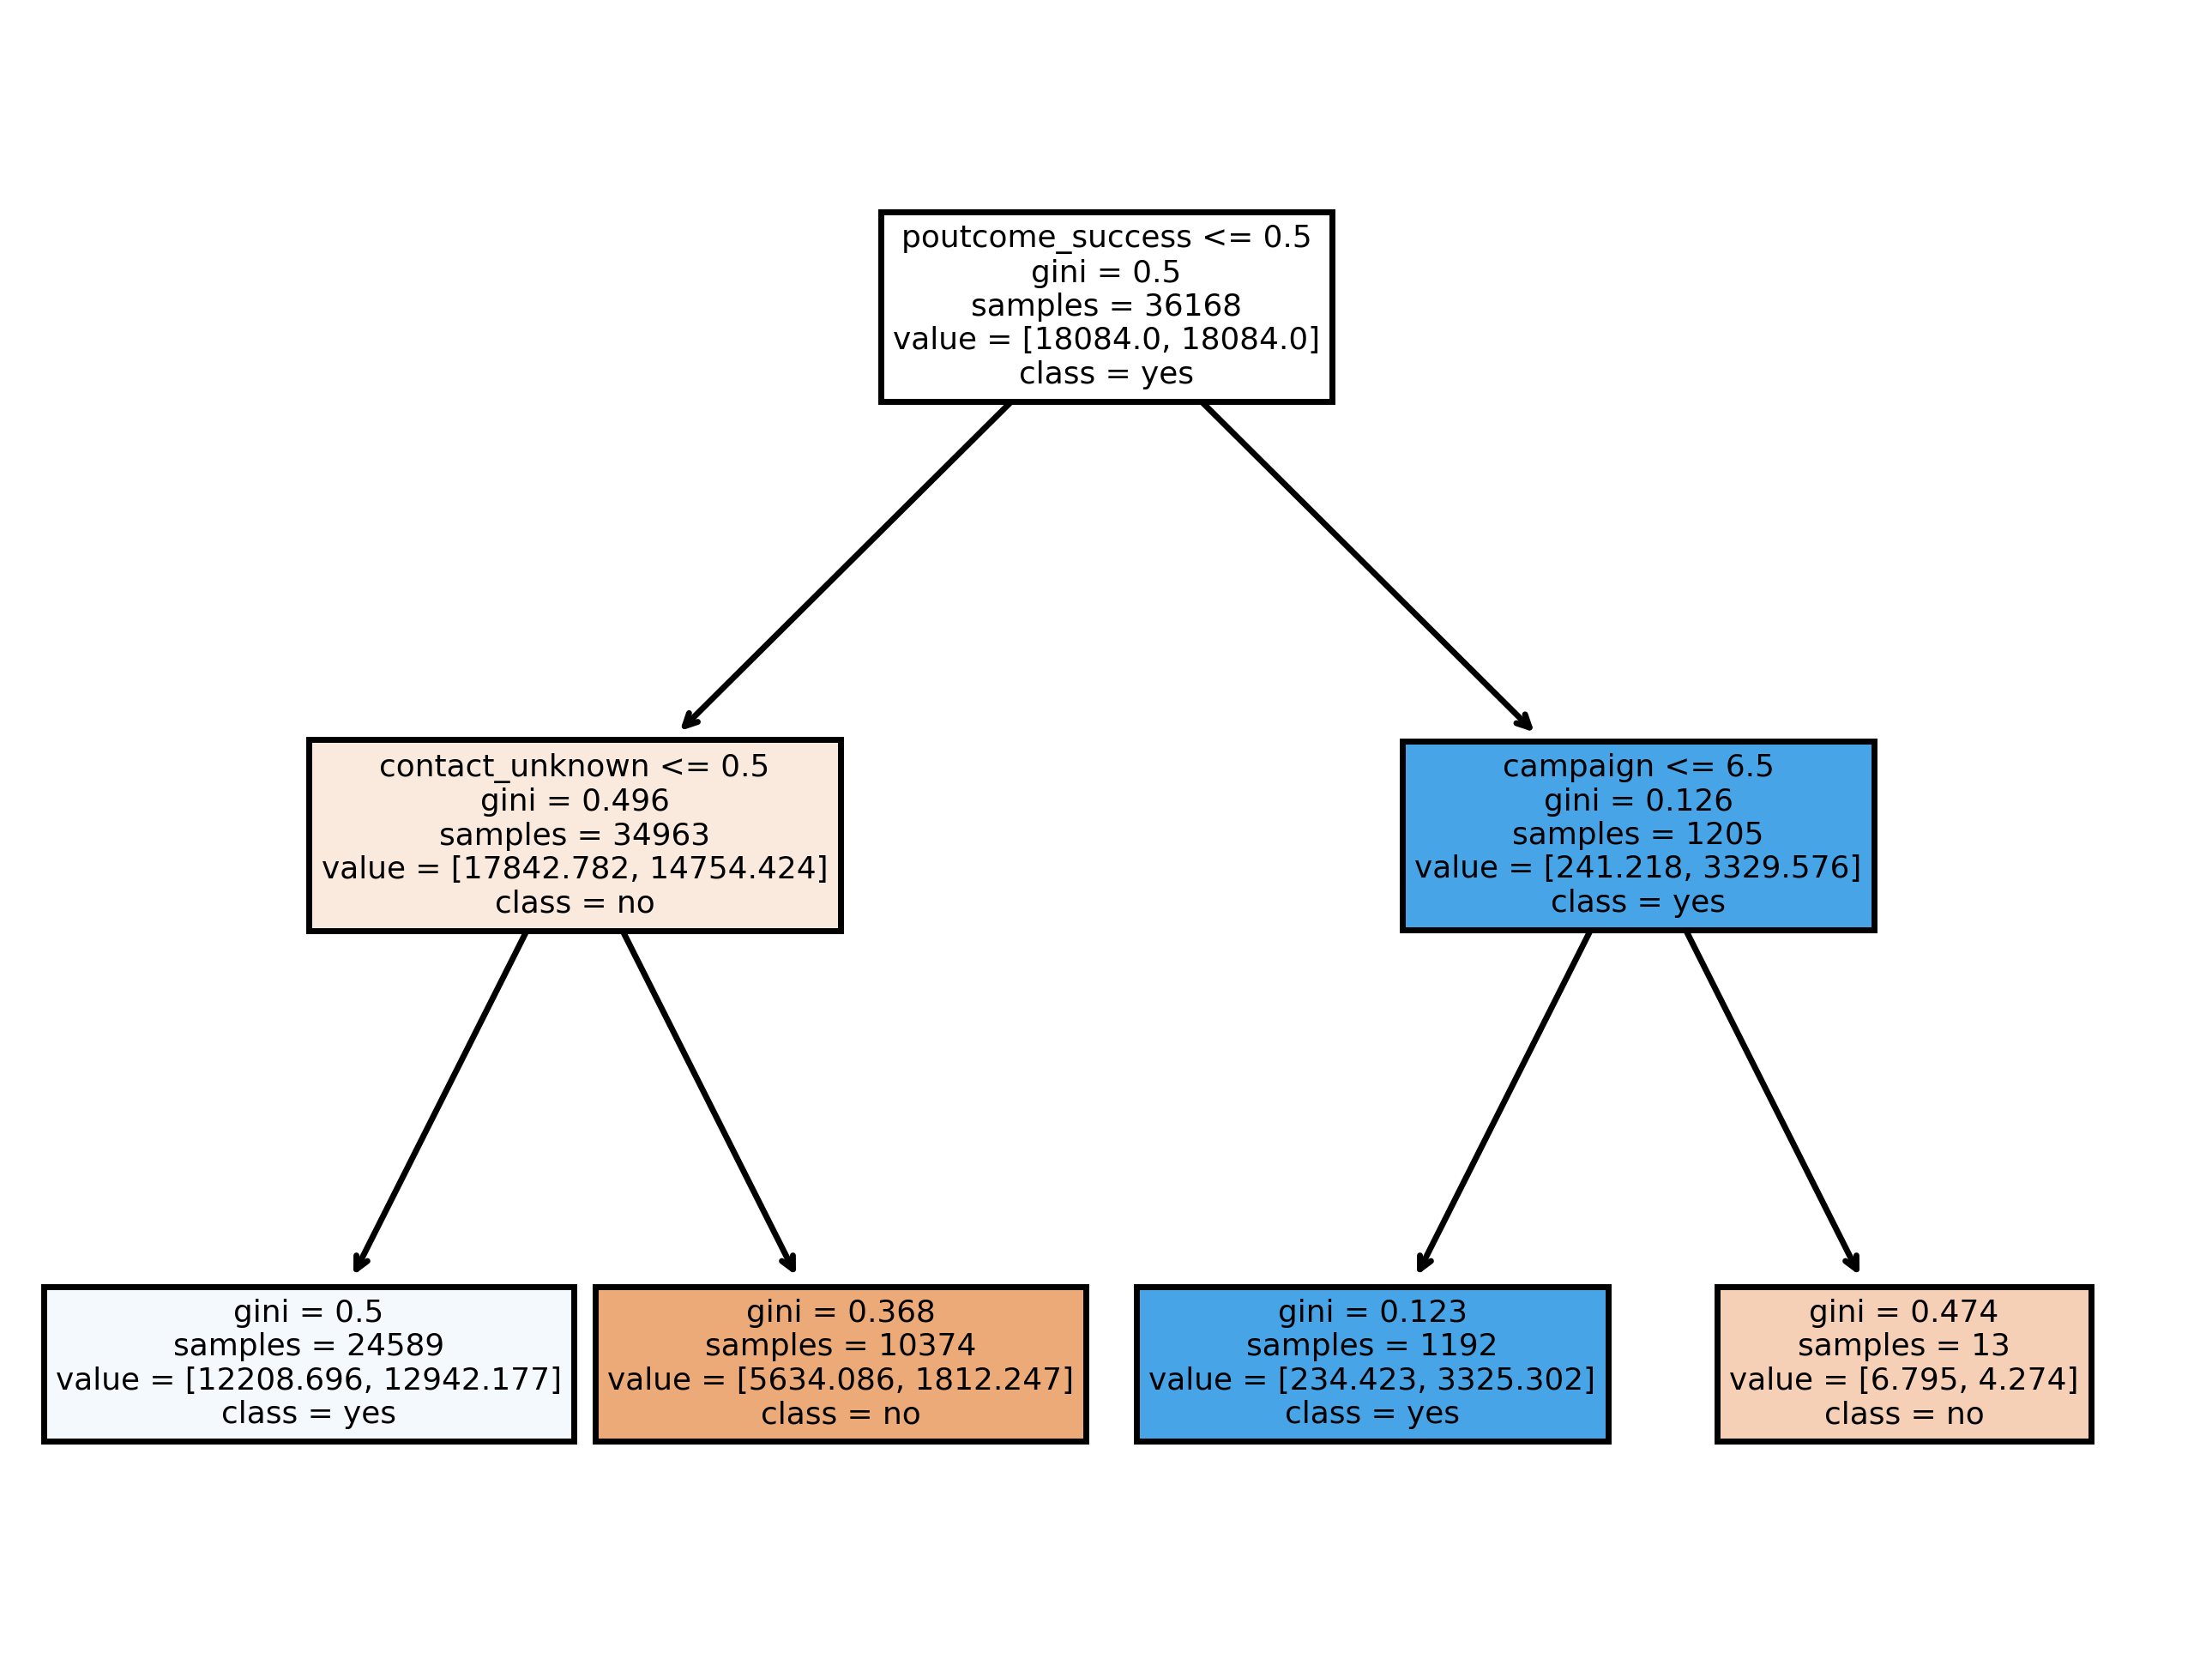

In [132]:
import matplotlib.pyplot as plt

plt.figure(dpi = 500)
tree.plot_tree(treeModel,
               class_names=treeModel.classes_,
               feature_names=X_train.columns,
               filled=True
               )
plt.show()

In [133]:
CM = metrics.confusion_matrix(y_test, treeModel.predict(X_test))
CM = pd.DataFrame(CM)
print(CM)
print("Reg árvore  acurácia = ",metrics.accuracy_score(y_test, treeModel.predict(X_test)))
print("Reg árvore presição = ",metrics.precision_score(y_test, treeModel.predict(X_test), pos_label="yes"))
print("Reg árvore Recall = ",metrics.recall_score(y_test, treeModel.predict(X_test), pos_label="yes"))

      0     1
0  2536  5449
1   106   952
Reg árvore  acurácia =  0.38571270596041135
Reg árvore presição =  0.14872676144352445
Reg árvore Recall =  0.8998109640831758


In [134]:
pd.Series(treeModel.feature_importances_,index = X_train.columns).sort_values(ascending=False)


poutcome_success        0.634991
contact_unknown         0.362169
campaign                0.002840
poutcome_failure        0.000000
month_jun               0.000000
month_may               0.000000
month_nov               0.000000
month_mar               0.000000
month_oct               0.000000
month_jan               0.000000
month_sep               0.000000
month_dec               0.000000
poutcome_nonexistent    0.000000
poutcome_other          0.000000
month_jul               0.000000
default_no              0.000000
default_yes             0.000000
housing_no              0.000000
housing_yes             0.000000
loan_no                 0.000000
loan_yes                0.000000
contact_telephone       0.000000
contact_cellular        0.000000
month_feb               0.000000
age                     0.000000
balance                 0.000000
job_admin.              0.000000
day_of_week             0.000000
pdays                   0.000000
previous                0.000000
job_techni

# Random florest

In [135]:
from sklearn import ensemble
randomFlorestModel = ensemble.RandomForestClassifier(n_estimators=500,min_samples_leaf=10,
                                                     random_state=42,class_weight="balanced")
randomFlorestModel.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=10,
                       n_estimators=500, random_state=42)

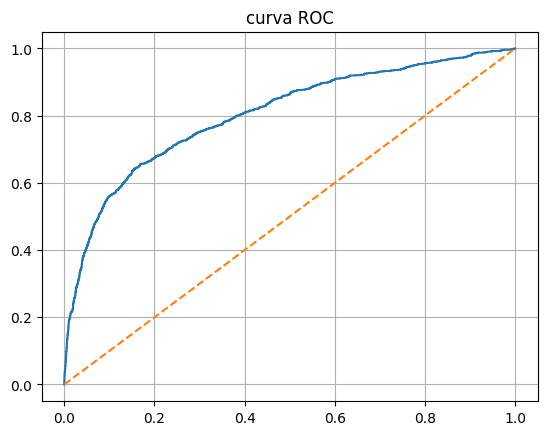

In [136]:
roc_curve = metrics.roc_curve(y_test,randomFlorestModel.predict_proba(X_test)[:,1],pos_label="yes")
plt.plot(roc_curve[0],roc_curve[1])
plt.plot([0,1],[0,1],"--")
plt.title("curva ROC")
plt.grid()
plt.show()

In [137]:
CM = metrics.confusion_matrix(y_test, randomFlorestModel.predict(X_test))
CM = pd.DataFrame(CM)
print(CM)
print("Reg Random florest  acurácia = ",metrics.accuracy_score(y_test, randomFlorestModel.predict(X_test)))
print("Reg Random florest presição = ",metrics.precision_score(y_test, randomFlorestModel.predict(X_test), pos_label="yes"))
print("Reg Random florest Recall = ",metrics.recall_score(y_test, randomFlorestModel.predict(X_test), pos_label="yes"))

      0    1
0  7057  928
1   447  611
Reg Random florest  acurácia =  0.8479486895941613
Reg Random florest presição =  0.39701104613385313
Reg Random florest Recall =  0.5775047258979206
